Final Project for Text Information Systems (CS410 Fall 2022)
Video Game Review Classifier
Nate Smolczyk (nds6)

In [1]:
# The dataset includes all sorts of video game products, like memory cards and controllers. First I parse out the video game reviews and the attributes I need. 

import nltk
from nltk.corpus import stopwords
import pandas as pd
import json
import matplotlib.pyplot as plt

rawdata = open('Video_Games_5.json', 'r')
videogamedata = open('videogames.json', 'x')
Lines = rawdata.readlines()

for line in Lines:
    x = json.loads(line)
    obj = {**x}
    if 'style' in obj:
        y = obj['style']
        if 'Format:' in y:
            format = y['Format:']
            if(format == ' Video Game' and 'reviewText' in obj):
                obj2 = {}
                obj2['rating'] = obj['overall']
                obj2['text'] = obj['reviewText']
                videogamedata.write(json.dumps(obj2))
                videogamedata.write(',')
                videogamedata.write('\n')

FileExistsError: [Errno 17] File exists: 'videogames.json'

In [2]:
df = pd.read_json('./videogames.json')

<BarContainer object of 5 artists>

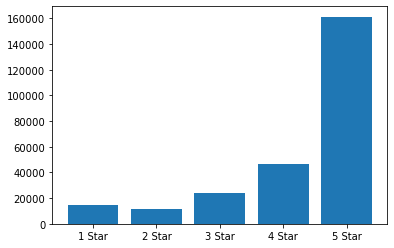

In [3]:
count1starratings = df[df['rating'] == 1].size
count2starratings = df[df['rating'] == 2].size
count3starratings = df[df['rating'] == 3].size
count4starratings = df[df['rating'] == 4].size
count5starratings = df[df['rating'] == 5].size

yAxis = [count1starratings, count2starratings, count3starratings, count4starratings, count5starratings]
xAxis = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']

plt.bar(xAxis, yAxis)

In [4]:
allWords = []
from nltk.tokenize import word_tokenize
import string
wordCounts = {}
documents = []

stop_words = set(stopwords.words('english'))

for index, row in df.iterrows():
    text = row['text']
    tokens = word_tokenize(text)
    filteredTokens = [w.lower() for w in tokens if not w.lower() in stop_words and len(w) > 1 and len(w) < 30]
    for token in filteredTokens:
        allWords.append(token)
        if token in wordCounts:
            wordCounts[token] += 1
        else:
            wordCounts[token] = 1
    val = "pos"
    if row["rating"] in [1, 2]:
        val = "neg"
    documents.append((filteredTokens, val))
    

In [5]:

all_words = nltk.FreqDist(w for w in allWords)

word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [6]:
# Train Naive Bayes classifier
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[0:200], featuresets[201:400]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [7]:
# Test the classifier
print(nltk.classify.accuracy(classifier, test_set))

0.8994974874371859


In [13]:
# Show the most important features as interpreted by Naive Bayes
classifier.show_most_informative_features(10)

Most Informative Features
        contains(boring) = True              neg : pos    =     26.4 : 1.0
      contains(standard) = True              neg : pos    =     26.4 : 1.0
        contains(stupid) = True              neg : pos    =     26.4 : 1.0
        contains(aspect) = True              neg : pos    =     15.8 : 1.0
       contains(average) = True              neg : pos    =     15.8 : 1.0
         contains(basic) = True              neg : pos    =     15.8 : 1.0
        contains(bigger) = True              neg : pos    =     15.8 : 1.0
          contains(book) = True              neg : pos    =     15.8 : 1.0
         contains(cause) = True              neg : pos    =     15.8 : 1.0
      contains(consider) = True              neg : pos    =     15.8 : 1.0
